___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv("Ready_to_ML.csv")

df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,Alloy wheels,1270.0,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,Dealer,1.0,1.0,0.0,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,Dealer,1991.0,8.0,162.0,4WD,Alloy wheels,1555.0,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Sport seats,1455.0,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Alloy wheels,1545.0,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [7]:
df.drop(["location", "make"], axis=1, inplace=True)

In [9]:
df.make_model.value_counts()

make_model
Renault Megane       832
SEAT Leon            784
Volvo V40            740
Dacia Sandero        730
Hyundai i30          706
                    ... 
Toyota Prius+          1
Peugeot iOn            1
Peugeot 106            1
Mercedes-Benz SLR      1
Renault R 11           1
Name: count, Length: 490, dtype: int64

In [11]:
wanted = df.make_model.value_counts()[df.make_model.value_counts() > 100].index

In [13]:
df = df[df.make_model.isin(wanted)]

In [15]:
df.shape

(19744, 25)

In [17]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(16630, 25)

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

### Converting the Extras feature from object to numeric

In [21]:
df["extras"] = df.extras.str.count(',') + 1

In [23]:
for col in df.columns:
    print(df[col].value_counts())
    print('---' * 15)

make_model
Renault Megane    809
SEAT Leon         733
Opel Astra        627
Hyundai i30       557
Ford Mustang      544
                 ... 
Volvo V90         104
Nissan Juke        99
Toyota RAV 4       98
Hyundai IONIQ      97
Nissan Pulsar      70
Name: count, Length: 70, dtype: int64
---------------------------------------------
price
16990.0    128
14990.0    123
19990.0    118
12990.0    117
18990.0    112
          ... 
27818.0      1
13551.0      1
21773.0      1
16385.0      1
36795.0      1
Name: count, Length: 3650, dtype: int64
---------------------------------------------
body_type
Sedan               3577
Compact             3273
Station wagon       3259
Off-Road/Pick-up    3197
Convertible         1682
Coupe               1642
Name: count, dtype: int64
---------------------------------------------
type
Used              14605
Pre-registered      877
Demonstration       772
Employee's car      376
Name: count, dtype: int64
---------------------------------------------
w

## multicollinearity control

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [25]:
df.corr(numeric_only=True) > 0.9

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
price,True,False,False,False,False,False,False,False,False,False,False
mileage,False,True,False,False,False,False,False,False,False,False,False
engine_size,False,False,True,False,False,False,False,False,False,False,False
gears,False,False,False,True,False,False,False,False,False,False,False
co_emissions,False,False,False,False,True,False,False,False,False,False,False
extras,False,False,False,False,False,True,False,False,False,False,False
empty_weight,False,False,False,False,False,False,True,False,False,False,False
previous_owner,False,False,False,False,False,False,False,True,False,False,False
age,False,False,False,False,False,False,False,False,True,False,False
power_kW,False,False,False,False,False,False,False,False,False,True,False


### Train | Test Split

In [27]:
from sklearn.model_selection import train_test_split

X= df.drop(columns="price")
y= df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## OneHotEncoder

### Example

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [ ]:
data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,bed,6
6,good,7
7,good,8
8,bad,9
9,car,10


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)

In [ ]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,good


In [ ]:
X_test

,col
7,good
8,bad
9,car


In [ ]:
enc.fit_transform(X_train)
# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.


,col_bad,col_bed,col_good,col_worst
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0


In [ ]:
enc.transform(X_test)
# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1, while the non-observations (car) are converted to 0.


,col_bad,col_bed,col_good,col_worst
7,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


## OrdinalEncoder

### Example

In [ ]:
data = {"col": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,good,6
6,good,7
7,bad,8
8,ugly,9
9,worst,10


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.4, shuffle=False)

In [ ]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,good


In [ ]:
X_test

,col
6,good
7,bad
8,ugly
9,worst


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.

enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

In [ ]:
enc_2.fit_transform(X_train)

,col
0,1.0
1,0.0
2,2.0
3,2.0
4,1.0
5,2.0


In [ ]:
enc_2.transform(X_test)

,col
6,2.0
7,1.0
8,-1.0
9,0.0


### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

## Scaling

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [31]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [33]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_type,
                                                     cat_for_comfort,
                                                     cat_for_ent,
                                                     cat_for_safety]),cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False).set_output(transform='pandas')

In [35]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['make_model', 'body_type', 'warranty',
                                  'gearbox', 'fuel_type', 'seller',
                                  'drivetrain', 'full_service_history',
                                  'upholstery', 'energy_efficiency_class']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Used',
                                                             "Employee's car",
                                                             'Demonstration',
                                                             'Pre-registered'],
                                                            ['Standard',
                                                             'Premium',
                                                             'Premium Plus'],
                                                            ['Standard',
                                                             'Plus'],
                                                            ['Safety Standard '
                                                             'Package',
                                                             'Safety Premium '
                                                             'Package',
                                                             'Safety Premium '
                                                             'Plus Package']]),
                                 ['type', 'comfort_&_convenience_Package',
                                  'entertainment_&_media_Package',
                                  'safety_&_security_Package'])],
                  verbose_feature_names_out=False)

In [37]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [39]:
pd.options.display.float_format = '{:.3f}'.format
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : root_mean_squared_error(y_train, y_train_pred),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : root_mean_squared_error(y_test, y_pred),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [43]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
vanilla = train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)
vanilla

,train,test
R2,0.827,0.855
mae,2960.844,2892.552
mse,29227131.453,22649677.403
rmse,5406.212,4759.168
mape,0.212,0.192


In [51]:
y_pred = lm.predict(X_test_scaled)

In [53]:
adj_r2(y_test, y_pred, X_test_scaled)

0.8503689780262073

## Cross Validate

In [55]:
from sklearn.model_selection import cross_validate

In [57]:
scores = cross_validate(LinearRegression(), X_train_scaled, y_train, 
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        return_train_score=True)

In [59]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.829
train_r2                                           0.828
test_neg_mean_absolute_error                   -2986.934
train_neg_mean_absolute_error                  -2961.261
test_neg_mean_squared_error                -29718506.993
train_neg_mean_squared_error               -29205898.860
test_neg_root_mean_squared_error               -5361.437
train_neg_root_mean_squared_error              -5402.953
test_neg_mean_absolute_percentage_error           -0.214
train_neg_mean_absolute_percentage_error          -0.212
dtype: float64

In [61]:
vanilla

,train,test
R2,0.827,0.855
mae,2960.844,2892.552
mse,29227131.453,22649677.403
rmse,5406.212,4759.168
mape,0.212,0.192


## Prediction Error

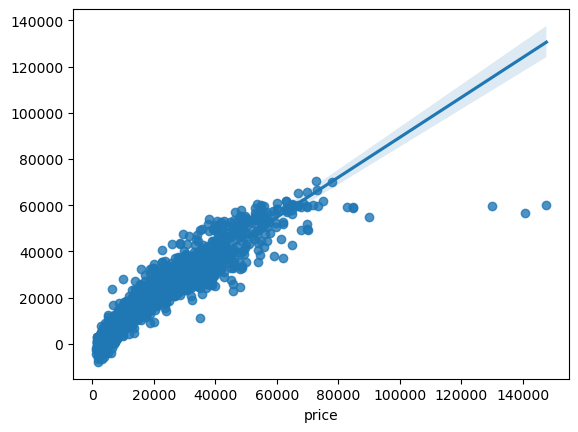

In [63]:
sns.regplot(x=y_test, y=y_pred);

## Residual Plot

In [65]:
residuals = y_test - y_pred

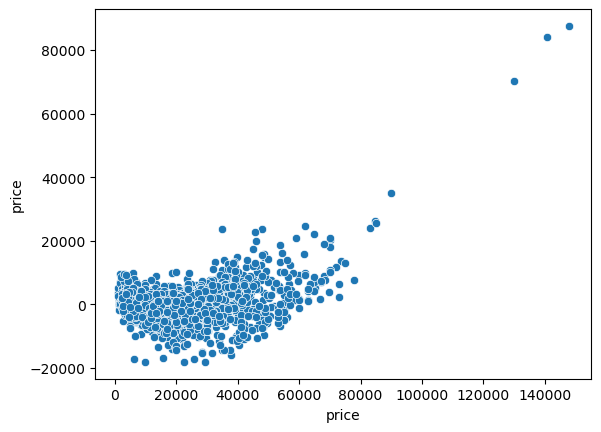

In [67]:
sns.scatterplot(x=y_test, y=residuals);

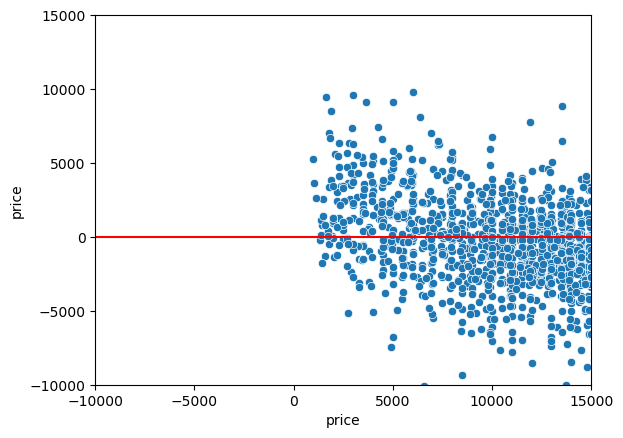

In [69]:
sns.scatterplot(x=y_test, y=residuals)
plt.xlim([-10000,15000])
plt.ylim([-10000,15000])
plt.axhline(0, color='r')
plt.show()

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [71]:
df2 = df.copy()

In [73]:
df = df[(df.price > 8000) & (df.price < 70000)]

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [75]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [77]:
X_train= column_trans.fit_transform(X_train)
X_test= column_trans.transform(X_test)

In [79]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
lm_2 = LinearRegression()
lm_2.fit(X_train_scaled, y_train)

LinearRegression()

In [85]:
vanilla2 = train_val(lm_2, X_train_scaled, y_train, X_test_scaled, y_test)
vanilla2

,train,test
R2,0.877,0.878
mae,2631.800,2627.863
mse,14711572.122,14662227.135
rmse,3835.567,3829.129
mape,0.130,0.129


In [87]:
vanilla

,train,test
R2,0.827,0.855
mae,2960.844,2892.552
mse,29227131.453,22649677.403
rmse,5406.212,4759.168
mape,0.212,0.192


## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [89]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [93]:
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_type, cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [95]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

rm = Pipeline(steps=operations)
rm.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [99]:
ridge_basic = train_val(rm, X_train, y_train, X_test, y_test)
ridge_basic

,train,test
R2,0.877,0.877
mae,2636.601,2619.513
mse,14545457.334,15377159.384
rmse,3813.851,3921.372
mape,0.130,0.131


In [101]:
vanilla2

,train,test
R2,0.877,0.878
mae,2631.800,2627.863
mse,14711572.122,14662227.135
rmse,3835.567,3829.129
mape,0.130,0.129


## Cross Validation

In [103]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [105]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.874
train_r2                                           0.877
test_neg_mean_absolute_error                   -2663.759
train_neg_mean_absolute_error                  -2635.304
test_neg_mean_squared_error                -14903318.016
train_neg_mean_squared_error               -14527458.405
test_neg_root_mean_squared_error               -3856.719
train_neg_root_mean_squared_error              -3811.443
test_neg_mean_absolute_percentage_error           -0.131
train_neg_mean_absolute_percentage_error          -0.130
dtype: float64

In [107]:
ridge_basic

,train,test
R2,0.877,0.877
mae,2636.601,2619.513
mse,14545457.334,15377159.384
rmse,3813.851,3921.372
mape,0.130,0.131


## Finding best alpha for Ridge

In [109]:
from sklearn.model_selection import GridSearchCV

alpha_space = np.linspace(0.01, 10, 100)

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space}

rm_grid = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [111]:
rm_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('...
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [113]:
rm_grid.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.220909090909091))])

In [117]:
ridge_best = train_val(rm_grid, X_train, y_train, X_test, y_test)
ridge_best

,train,test
R2,0.877,0.877
mae,2636.402,2619.676
mse,14548615.823,15385057.276
rmse,3814.265,3922.379
mape,0.130,0.131


In [119]:
ridge_basic

,train,test
R2,0.877,0.877
mae,2636.601,2619.513
mse,14545457.334,15377159.384
rmse,3813.851,3921.372
mape,0.130,0.131


## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [121]:
from sklearn.linear_model import Lasso

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [125]:
lasso_basic = train_val(lasso_model, X_train, y_train, X_test, y_test)
lasso_basic

,train,test
R2,0.877,0.877
mae,2637.313,2621.163
mse,14573845.630,15442707.419
rmse,3817.571,3929.721
mape,0.130,0.131


In [127]:
ridge_basic

,train,test
R2,0.877,0.877
mae,2636.601,2619.513
mse,14545457.334,15377159.384
rmse,3813.851,3921.372
mape,0.130,0.131


## Cross Validation

In [129]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [131]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.874
train_r2                                           0.877
test_neg_mean_absolute_error                   -2663.229
train_neg_mean_absolute_error                  -2636.289
test_neg_mean_squared_error                -14906057.045
train_neg_mean_squared_error               -14553755.535
test_neg_root_mean_squared_error               -3856.848
train_neg_root_mean_squared_error              -3814.890
test_neg_mean_absolute_percentage_error           -0.131
train_neg_mean_absolute_percentage_error          -0.130
dtype: float64

In [133]:
lasso_basic

,train,test
R2,0.877,0.877
mae,2637.313,2621.163
mse,14573845.630,15442707.419
rmse,3817.571,3929.721
mape,0.130,0.131


## Finding best alpha for Lasso

In [135]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [137]:
lasso_grid_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.713e+09, tolerance: 1.245e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.790e+09, tolerance: 1.260e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.085e+09, toler

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('...
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [139]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=1.019090909090909))])

In [141]:
lasso_best = train_val(lasso_grid_model, X_train, y_train, X_test, y_test)
lasso_best

,train,test
R2,0.877,0.877
mae,2637.336,2621.162
mse,14574680.557,15443427.193
rmse,3817.680,3929.813
mape,0.130,0.131


In [145]:
ridge_best

,train,test
R2,0.877,0.877
mae,2636.402,2619.676
mse,14548615.823,15385057.276
rmse,3814.265,3922.379
mape,0.130,0.131


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [175]:
lasso_grid_model.best_estimator_["Lasso"]

Lasso(alpha=1.019090909090909)

In [147]:
df_feat_imp = pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_,
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
                         columns=["Coef"]
                         ).sort_values("Coef")

In [149]:
df_feat_imp

,Coef
age,-21154.544
mileage,-18142.005
make_model_Nissan 370Z,-4330.989
make_model_Dacia Sandero,-3685.263
make_model_Opel Corsa,-3362.252
...,...
make_model_Skoda Kodiaq,8517.975
make_model_Volvo XC60,8788.048
make_model_Volvo XC40,9331.973
make_model_Volvo XC90,14727.770


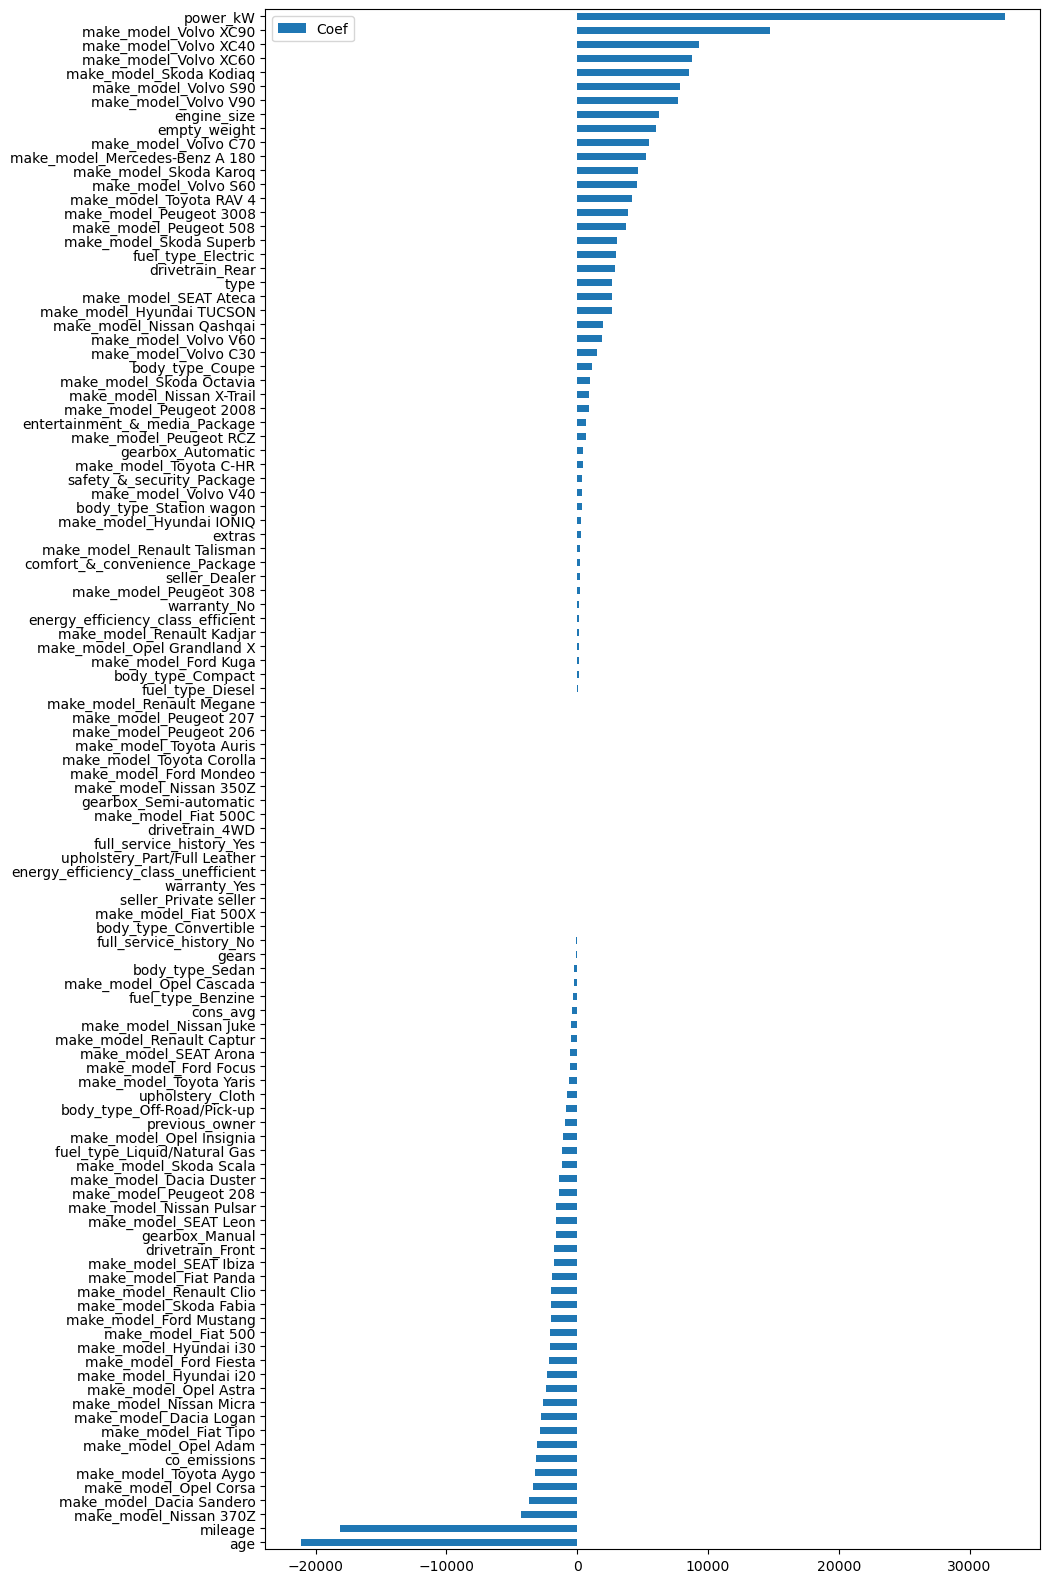

In [159]:
df_feat_imp.plot(kind='barh', figsize=(10, 20));

In [163]:
df_new = df[['make_model', 'power_kW', 'engine_size', 'empty_weight', 'fuel_type', 'mileage', 'age', 'price']]

In [179]:
df_new.head(1)

,make_model,power_kW,engine_size,empty_weight,fuel_type,mileage,age,price
13,Mercedes-Benz A 180,85.000,1461.000,1330.000,Diesel,27150.000,2.000,24400.000


In [165]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
cat_onehot = ['make_model', 'fuel_type']

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [183]:
operations = [("OneHot_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=1.019090909090909))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=1.019090909090909))])

In [187]:
lasso_final = train_val(lasso_final_model, X_train, y_train, X_test, y_test)
lasso_final

,train,test
R2,0.862,0.863
mae,2838.581,2812.048
mse,16301095.602,17187128.772
rmse,4037.462,4145.736
mape,0.141,0.142


## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

In [189]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [191]:
operations = [("OneHot_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=1.019090909090909))]
final_model = Pipeline(steps=operations)

In [193]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=1.019090909090909))])

In [203]:
X.head(10)

,make_model,power_kW,engine_size,empty_weight,fuel_type,mileage,age
13,Mercedes-Benz A 180,85.000,1461.000,1330.000,Diesel,27150.000,2.000
18,Mercedes-Benz A 180,85.000,1461.000,1445.000,Diesel,21734.000,2.000
20,Mercedes-Benz A 180,80.000,1461.000,1425.000,Diesel,172700.000,4.000
21,Mercedes-Benz A 180,85.000,1461.000,1455.000,Diesel,18989.000,2.000
22,Mercedes-Benz A 180,100.000,1332.000,1350.000,Benzine,25.000,1.000
31,Mercedes-Benz A 180,100.000,1332.000,1295.000,Benzine,20124.000,2.000
34,Mercedes-Benz A 180,90.000,1595.000,1395.000,Benzine,63871.000,5.000
35,Mercedes-Benz A 180,100.000,1332.000,1350.000,Benzine,26900.000,2.000
36,Mercedes-Benz A 180,85.000,1461.000,1445.000,Diesel,87700.000,4.000
38,Mercedes-Benz A 180,100.000,1332.000,1295.000,Benzine,52497.000,3.000


In [209]:
p_sample = {'make_model':'Mercedes-Benz A 180',
           'power_kW': 100,
           'engine_size': 1332,
           'empty_weight': 1395,
           'fuel_type': 'Benzine',
           'mileage': 1000,
           'age': 1}

new_observation = pd.DataFrame([p_sample])
new_observation

,make_model,power_kW,engine_size,empty_weight,fuel_type,mileage,age
0,Mercedes-Benz A 180,100,1332,1395,Benzine,1000,1


In [211]:
final_model.predict(new_observation)

array([33140.66870066])

In [213]:
df_new.head(10)

,make_model,power_kW,engine_size,empty_weight,fuel_type,mileage,age,price
13,Mercedes-Benz A 180,85.000,1461.000,1330.000,Diesel,27150.000,2.000,24400.000
18,Mercedes-Benz A 180,85.000,1461.000,1445.000,Diesel,21734.000,2.000,29800.000
20,Mercedes-Benz A 180,80.000,1461.000,1425.000,Diesel,172700.000,4.000,21000.000
21,Mercedes-Benz A 180,85.000,1461.000,1455.000,Diesel,18989.000,2.000,26800.000
22,Mercedes-Benz A 180,100.000,1332.000,1350.000,Benzine,25.000,1.000,32900.000
31,Mercedes-Benz A 180,100.000,1332.000,1295.000,Benzine,20124.000,2.000,32950.000
34,Mercedes-Benz A 180,90.000,1595.000,1395.000,Benzine,63871.000,5.000,18390.000
35,Mercedes-Benz A 180,100.000,1332.000,1350.000,Benzine,26900.000,2.000,25900.000
36,Mercedes-Benz A 180,85.000,1461.000,1445.000,Diesel,87700.000,4.000,25400.000
38,Mercedes-Benz A 180,100.000,1332.000,1295.000,Benzine,52497.000,3.000,29900.000


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___